### Importing necessary libraries and packages

In [295]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error # accuracy metric
from joblib import dump
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [296]:
df = pd.read_csv("Point_Values.csv")
df.head()

,Points,Values
0,-10.0,-1358
1,-9.5,-1200
2,-9.0,-1000
3,-8.5,-850
4,-8.0,-734


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Points  41 non-null     float64
 1   Values  41 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 784.0 bytes


In [298]:
df.describe()

,Points,Values
count,41.000000,41.000000
mean,0.000000,0.000000
std,5.989574,573.598858
min,-10.000000,-1358.000000
25%,-5.000000,-203.000000
50%,0.000000,0.000000
75%,5.000000,203.000000
max,10.000000,1358.000000


In [299]:
df.isnull().sum()

Points    0
Values    0
dtype: int64

In [300]:
df.columns

Index(['Points', 'Values'], dtype='object')

In [301]:
df.corr()

,Points,Values
Points,1.000000,0.926989
Values,0.926989,1.000000


In [302]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

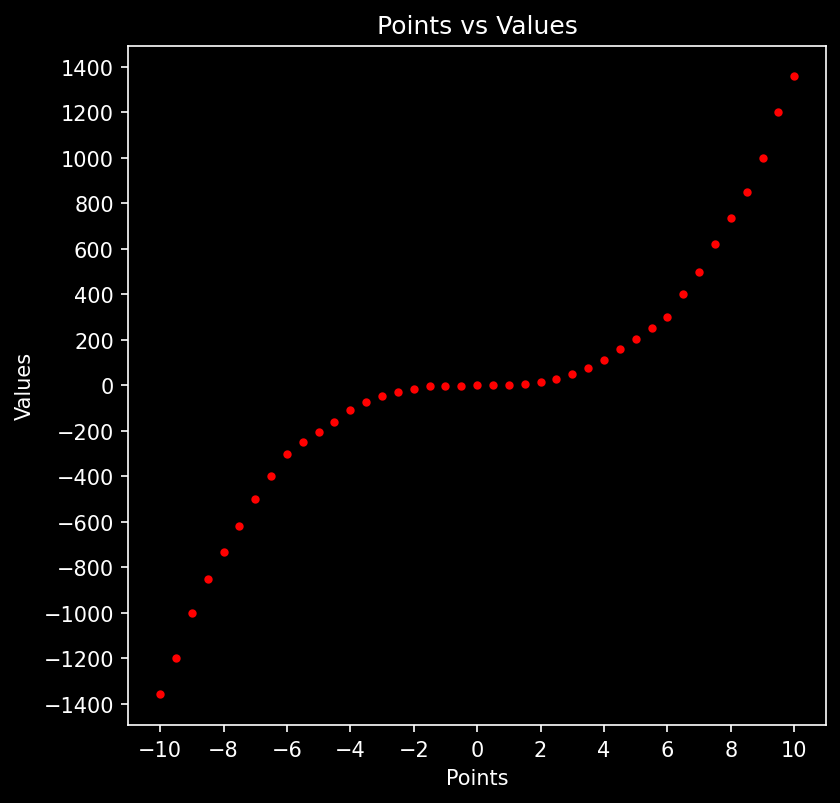

In [303]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Points = df['Points']
Values = df['Values']
plt.scatter(Points, Values, marker=".", color="red")
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400,1500,200))
plt.title("Points vs Values")
plt.xlabel("Points")
plt.ylabel("Values")
plt.savefig("Images/Points_vs_Values.png",bbox_inches='tight')

In [304]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [305]:
svr = SVR(kernel='rbf', C=1000, gamma=0.5)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [306]:
# Printing the coefficient of determination of the regression
print("The coefficient of determination :", r2_score(y_test,y_pred))
adjusted_r2_score = 1 - ((1-r2_score(y_test,y_pred))*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9998938507613121
The adjusted coefficient of determination : 0.9998584676817495


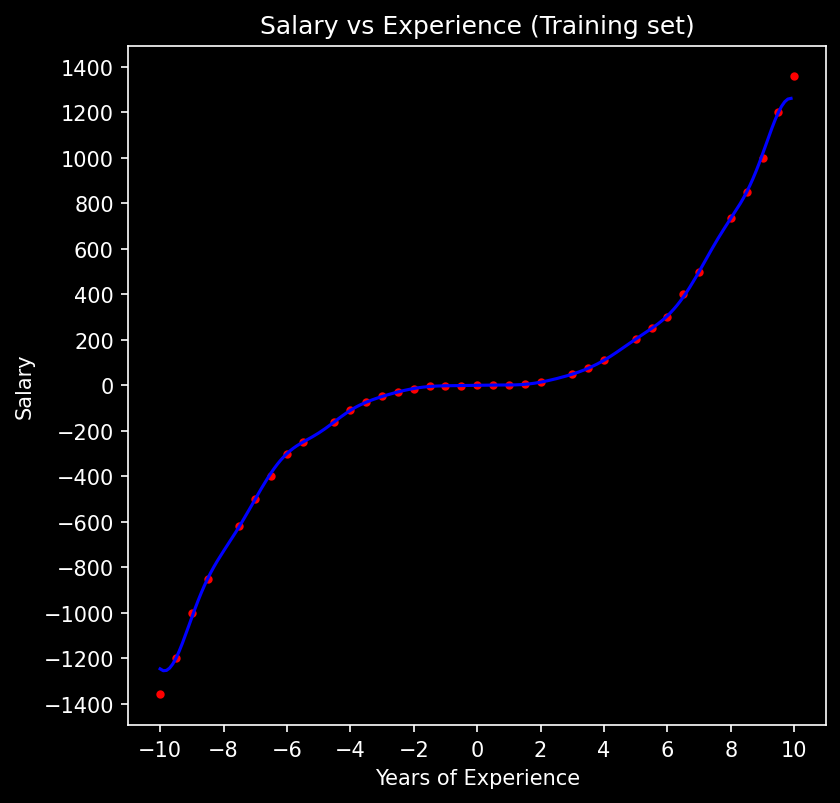

In [307]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
X_train_grid = np.arange(min(X_train), max(X_train), 0.1)
X_train_grid = X_train_grid.reshape((len(X_train_grid), 1))
plt.scatter(X_train, y_train, marker=".", color='red')
plt.plot(X_train_grid, svr.predict(X_train_grid), color='blue')
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400,1500,200))
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig("Images/Training_set.png",bbox_inches='tight')

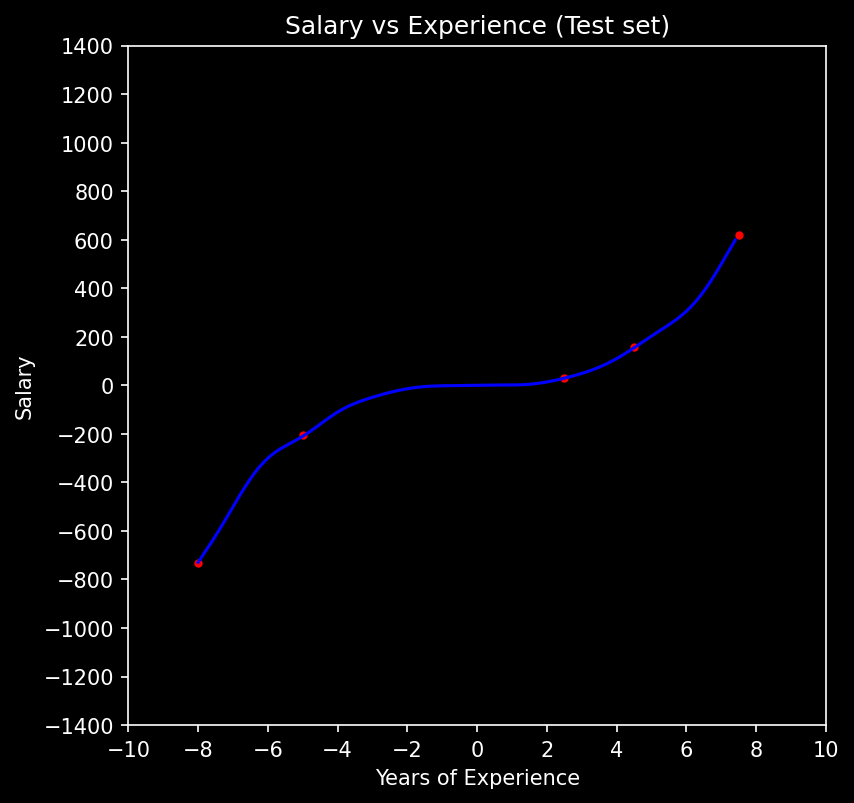

In [308]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
X_test_grid = np.arange(min(X_test), max(X_test), 0.1)
X_test_grid = X_test_grid.reshape((len(X_test_grid), 1))
plt.scatter(X_test, y_test, marker=".", color='red')
plt.plot(X_test_grid, svr.predict(X_test_grid), color='blue')
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400,1500,200))
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig("Images/Test_set.png", bbox_inches='tight')

In [309]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 4.0291247134254125
Mean Squared Error (MSE) : 20.965094552412744
Root Mean Squared Error (RMSE) : 4.5787656144874616
Mean Absolute Percentage Error (MAPE) : 0.01819608213934027


In [310]:
dump(svr, 'supportVectorRegressor.joblib')

['supportVectorRegressor.joblib']